<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/UCI_raisin_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Introdction
* [Download sample data set: Raisin](https://archive.ics.uci.edu/dataset/850/raisin) (CINAR I., KOKLU M. and TASDEMIR S., 2020)[1]

UCI Macine Learning Repository의 Raisin(; 건포도) data set을 사용해서 5가지 타입의 분류를 수행한다.  
또한 그 중에서도 우선 **Binary Classification**에 대해서만 수행한다.

**types of Classification algorithms that we use**  
* #1. K-Nearest Neighbors; K-NN
* #2. Logistic Regression; LR
* #3. Decision Tree; DT
* #4. Random Forest; RF
* #5. Support Vector Machine; SVM

## 0. 1. How to Upload & Load file to google colab
[ref1. google colab에서 file 사용하기](https://teki.tistory.com/29)  
[ref2. colab에 csv 파일 불러오기](https://resultofeffort.tistory.com/60)  

다음 cell에서 google colab의 default working directory를 확인할 수 있다.  
또한 기본적으로 `files.upload()`를 통해 업로드한 파일은 working directory에 저장된다.

In [ ]:
import os

# in colab, default working directory is /content
print(os.popen('pwd').read())

/content



In [1]:
from google.colab import files

uploaded = files.upload()

Saving Raisin_Dataset.xlsx to Raisin_Dataset.xlsx


# 1. K-Nearest Neighbors; K-NN




[cf. manual of pandas.read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

In [ ]:
import pandas as pd

# df = pd.read_excel('./Raisin_Dataset.xlsx', header=None)
# df = pd.read_excel('./Raisin_Dataset.xlsx', header=1)
raisin = pd.read_excel('./Raisin_Dataset.xlsx', header=0) # cf. header parameter default = 0
raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
print(raisin.shape) # cf. 900 rows, 8 columns

(900, 8)


해당 실습에서는 Classification을 진행하므로 다음과 같이 구분할 수 있겠다.  
* 900개의 **data instances**
* 7개의 **features**(Area, MajorAxisLength, ..., Perimeter) -> 수학에서의 *independent variables*
* 1개의 **label**(Class) -> 수학에서의 *dependent variable*

또한 다음 cell과 같이 Class에 어떤 종류가 있는지 확인할 수 있다.

In [ ]:
print(raisin['Class'].unique()) # cf. pandas dataframe에서의 unique 출력 방법(1)
print(pd.unique(raisin['Class'])) # cf. pandas dataframe에서의 unique 출력 방법(2)

['Kecimen' 'Besni']
['Kecimen' 'Besni']


In [ ]:
print(raisin.to_numpy()) # cf. default, no include header

[[87524 442.2460114 253.291155 ... 0.758650579 1184.04 'Kecimen']
 [75166 406.690687 243.0324363 ... 0.68412957 1121.786 'Kecimen']
 [90856 442.2670483 266.3283177 ... 0.637612812 1208.575 'Kecimen']
 ...
 [99657 431.7069809 298.8373229 ... 0.741098519 1292.828 'Besni']
 [93523 476.3440939 254.1760536 ... 0.658798253 1258.548 'Besni']
 [85609 512.0817743 215.2719758 ... 0.632019963 1272.862 'Besni']]


In [ ]:
raisin_input = raisin[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent','Perimeter']].to_numpy()
raisin_target = raisin['Class'].to_numpy()
print(raisin_input[:3]) # standardization 필요한 것을 확인할 수 있음
print(raisin_target[:3])

[[8.75240000e+04 4.42246011e+02 2.53291155e+02 8.19738392e-01
  9.05460000e+04 7.58650579e-01 1.18404000e+03]
 [7.51660000e+04 4.06690687e+02 2.43032436e+02 8.01805234e-01
  7.87890000e+04 6.84129570e-01 1.12178600e+03]
 [9.08560000e+04 4.42267048e+02 2.66328318e+02 7.98353619e-01
  9.37170000e+04 6.37612812e-01 1.20857500e+03]]
['Kecimen' 'Kecimen' 'Kecimen']


이제 다음 작업을 수행한다.  
* data set을 train set과 test으로 나누기
* standardization

In [ ]:
from sklearn.model_selection import train_test_split

# cf. default, suffle parameter=True, test_size=0.25, train_size=1-test_size
train_input, test_input, train_target, test_target = train_test_split(
    raisin_input, raisin_target, random_state=42)

print(train_target.shape, test_target.shape) # cf. split ratio 0.75 : 0.25
print(test_target[:10]) # cf. shuffle

(675,) (225,)
['Kecimen' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen']


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled[:3]) # cf. standardization

[[ 0.75106207  0.41990635  1.17688387 -0.28346109  0.71769468  0.45627178
   0.71171931]
 [ 0.66451096  1.27602603  0.14642306  1.21792508  0.71125988 -0.91234575
   1.05471877]
 [ 0.74196472  0.75985771  0.69649065  0.5325457   0.72097279  0.23244067
   0.75654943]]


이제 다음 작업을 수행한다.  
* Model training(fitting) by `fit()`
* Model의 accuracy 확인 by `score()`

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

# underfitting이라고 판단할 수 있겠다.
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8844444444444445
0.8266666666666667


이제 다음 작업을 수행한다.  
* Solve the underfitting

> fix, solve, handle, deal with 등의 용어를 사용할 수 있다.  
  * [Link](https://www.linkedin.com/advice/0/how-can-you-fix-underfitting-deep-learning-optimization-jxjae)
  How can you **fix** underfitting in deep learning optimization?
  * [Link](https://allcloud.io/blog/how-to-solve-underfitting-and-overfitting-data-models/)
  How to **Solve** Underfitting and Overfitting Data Models
  * [Link](https://deepchecks.com/question/how-do-we-handle-overfitting-and-underfitting-in-a-machine-learning-model/) How do we **handle** overfitting and underfitting in a machine learning model?
  * [Link](https://medium.com/@akshaykr.sharma19966/steps-to-deal-with-overfitting-and-underfitting-on-image-data-using-image-augmentation-87848ab06351)
  Steps to **deal with** Overfitting and Underfitting on Image Data using Image Augmentation.

이때 underfitting의 원인에 따라 해결을 위한 접근방식을 다르게 취해야 한다.  
underfitting의 원인은 다음과 같이 추정할 수 있다.  

**common causes of underfitting**
  * 적은 수의 training data
  * 낮은 Complexity
  * ...

Model의 Complexity를 높이는 방법에는 여러 가지가 있다.  
그 중 K-NN의 경우 **K**의 값을 줄여서 Complexity를 쉽게 높일 수 있다.
> k의 값을 지정하는 `n_neighbors` parameter는 default 값이 5이다.

In [ ]:
# 처음에 attribute 설정을 잘못해서 n_neighbors가 아닌, k_neighbors라고 입력함.
# 이 경우 python은 k_neighbors라는 attribute를 새로 만든다.
# del 명령으로 삭제가 가능
# kn.k_neighbors = 3
# del kn.k_neighbors

kn.n_neighbors = 3
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8977777777777778
0.8311111111111111


위 cell에서 n_neighbors의 수를 낮게 조정하여 model complexity를 높이려고 시도했다.  
그 결과로 train set에 대한 score는 높아졌지만, test set에 대한 score는 더 낮아져서 여전히 underfitting인 상태이다.  
다음 cell을 통해서 n_neighbors value 조정에 따른 train set과 test set의 score를 확인하자.

In [ ]:
for n in range(2, 7):
    kn.n_neighbors = n
    kn.fit(train_scaled, train_target)
    print(">> n_neighbors is %d" % n)
    print("train set score: %f" % kn.score(train_scaled, train_target))
    print("test  set score: %f\n" % kn.score(test_scaled, test_target))

kn.n_neighbors = 3

>> n_neighbors is 2
train set score: 0.918519
test  set score: 0.768889

>> n_neighbors is 3
train set score: 0.897778
test  set score: 0.831111

>> n_neighbors is 4
train set score: 0.885926
test  set score: 0.808889

>> n_neighbors is 5
train set score: 0.884444
test  set score: 0.826667

>> n_neighbors is 6
train set score: 0.878519
test  set score: 0.826667



`n_neighbors`값은 3으로 놔두고, 이제 다른 방법으로 underfitting에 대한 해결을 시도하자.  
두 번째로 시도할 방법은 `PolynomialFeatures()`를 이용해서 feature의 수를 늘리는 것이다.  
`PolynomialFeatures` 클래스는 **original features**를 거듭 제곱 또는 서로 곱하여 **derived features**를 만든다.  
해당 예제에서는 다음과 같이 구분할 수 있겠다.  
* **original features**
  - $ x_1 $: Area
  - $ x_2 $: MajorAxisLength
  - ...
  - $ x_7 $: Perimeter
* **derived features**
  - $ x_1^2 $
  - $ x_2^2 $
  - ...
  - $ x_1*x_2 $
  - ...

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# default, degree=2, interaction_only=False
# degree는 최대 차수 지정 x_0^2와 x_0*x_1 모두 degree=2
# interaction_only는 True이면 거듭제곱은 하지 않음
poly = PolynomialFeatures(degree=2, interaction_only=False)
poly.fit(train_scaled)
train_poly = poly.transform(train_scaled)
test_poly = poly.transform(test_scaled)

print(train_poly.shape)
print(poly.get_feature_names_out())

(675, 36)
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3'
 'x0 x4' 'x0 x5' 'x0 x6' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5' 'x1 x6'
 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6'
 'x4^2' 'x4 x5' 'x4 x6' 'x5^2' 'x5 x6' 'x6^2']


In [ ]:
kn.fit(train_poly, train_target)

print(kn.score(train_poly, train_target))
print(kn.score(test_poly, test_target))

0.8948148148148148
0.8311111111111111


In [ ]:
for n in range(2, 7):
    kn.n_neighbors = n
    kn.fit(train_poly, train_target)
    print(">> n_neighbors is %d" % n)
    print("train set score: %f" % kn.score(train_poly, train_target))
    print("test  set score: %f\n" % kn.score(test_poly, test_target))

>> n_neighbors is 2
train set score: 0.920000
test  set score: 0.777778

>> n_neighbors is 3
train set score: 0.894815
test  set score: 0.831111

>> n_neighbors is 4
train set score: 0.885926
test  set score: 0.795556

>> n_neighbors is 5
train set score: 0.871111
test  set score: 0.835556

>> n_neighbors is 6
train set score: 0.874074
test  set score: 0.817778



지금까지 **`StandardScaler()`**와 **`n_neighbors`**, **`PolynomialFeatures()`**를 사용해서 model의 accuracy를 높이려는 시도를 했다.  
최종적으로 다음과 같이 정리할 수 있겠다.  

**standardization to Z-Score**, **n_neighbors=3**, **features=36**(original=7, derived=29)
* train set accuracy: 0.903704
* test  set accuracy: 0.844444

# 2. Logistic Regreesion; LR

In [2]:
import pandas as pd

raisin = pd.read_excel('./Raisin_Dataset.xlsx')
raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
raisin_input = raisin[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent','Perimeter']].to_numpy()
raisin_target = raisin['Class'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

# cf. default, suffle parameter=True, test_size=0.25, train_size=1-test_size
train_input, test_input, train_target, test_target = train_test_split(
    raisin_input, raisin_target, random_state=42)

# print(train_target.shape, test_target.shape) # cf. split ratio 0.75 : 0.25
# print(test_target[:10]) # cf. shuffle

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# print(train_scaled[:3]) # cf. standardization

In [6]:
from sklearn.linear_model import LogisticRegression

# default, C=1. 작을수록 Regularization 커진다.
# default, max_iter=100. Warning이 뜨지 않으면 default로 유지해도 된다.
lr = LogisticRegression(C=1, max_iter=100)
lr.fit(train_scaled, train_target)

predict = lr.predict(train_scaled[:5])
target = train_target[:5]
# 정상적으로 작동함을 확인
print(f"predict: {predict}")
print(f"target: {target}")

predict: ['Besni' 'Besni' 'Besni' 'Kecimen' 'Kecimen']
target: ['Besni' 'Besni' 'Besni' 'Kecimen' 'Kecimen']


In [7]:
print(lr.classes_)

['Besni' 'Kecimen']


In [8]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.8681481481481481
0.8577777777777778


현재 model은 underfitting 상태로 추정된다.  
따라서 먼저, LogisticRegression의 `C` Parameter를 조정하여 Regularization을 완화해보겠다.

In [9]:
lr.C = 15
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.8755555555555555
0.8577777777777778


위 cell을 보면 train set의 accuracy는 0.7 정도 증가했지만, test set의 accuracy는 변화하지 않았음을 확인할 수 있다.  
따라서 이번에는 features 수를 증가시켜서 model complexity를 높여보겠다.

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit(train_scaled)
train_poly = poly.transform(train_scaled)
test_poly = poly.transform(test_scaled)

In [11]:
# lr.C는 15인 상태
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.8844444444444445
0.8488888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


이번에도 크게 개선되지 않았다.  
또한 지금 내가 아는 수준에서는 model을 더 optimize하는 것은 어렵다고 판단된다.  
하단에 [**cf. test set accuracy 0.905 나온 사례**](https://colab.research.google.com/drive/16HPpP5GJiAsHI7ZahRtgKNpsXtlv3Qjz#scrollTo=jDD9uSvxnGfq&line=2&uniqifier=1) cell을 나중에 확인할 필요가 있겠다.

* * *
* * *

In [12]:
train_score = []
test_score = []
c_list = [100, 10, 1, 0.1, 0.01, 0.001]

for c in c_list:
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(train_poly, train_target)
    train_score.append(lr.score(train_poly, train_target))
    test_score.append(lr.score(test_poly, test_target))

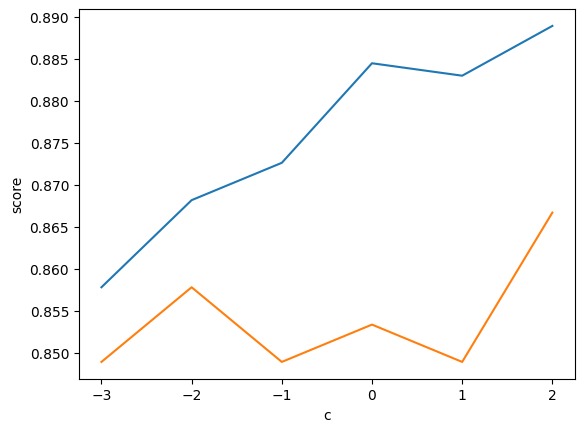

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.log10(c_list), train_score)
plt.plot(np.log10(c_list), test_score)
plt.xlabel('c')
plt.ylabel('score')
plt.show()

## cf. test set accuracy 0.905 나온 사례
[cf. github link](https://github.com/SuzanKiraz/Raisin-Class-Prediction-with-Logistic-Regression/blob/main/Raisin_Class_Prediction.ipynb)  
나와의 차이점은 LogisticRegression 클래스 객체를 생성할 때 `random_state` parameter를 다르게 설정했다는 점이다(나 42, 링크 101).  
그러면 data set을 split되는 형태에 따라서 accuracy 값이 크게 변할 수 있다는 것인데, 지금 내 수준으로는 다음과 같은 추측을 할 수 있겠다.  
* **추측1.** raisin의 features 중에서 outliar가 존재하는데, outliar가 train set과 test set에 얼마나 균등하게 split되느냐에 따라서 accuracy가 변동함.
* **추측2.** ...

# 3. Decision Tree; DT

# 4. Random Forest; RF

# 5. Support Vector Machine; SVM

# References
[1] CINAR I., KOKLU M. and TASDEMIR S., (2020), Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods. Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020.